In [83]:
#1.商品销售静态分析：
#1.1.各订单购买数量分析
import pandas as pd
import numpy as np
#为什么是\s+呢？
data = pd.read_csv('CDNOW.txt',header = None,sep='\s+',names = ['user_id','order_period','order_amount','order_money']) #不把第一行当作列属性
data.head(10)

,user_id,order_period,order_amount,order_money
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76
5,3,19970402,2,19.54
6,3,19971115,5,57.45
7,3,19971125,4,20.96
8,3,19980528,1,16.99
9,4,19970101,2,29.33


In [26]:
#添加列名：数据集一共包含四个字段：user_id，购买日期，购买数量和购买金额（为什么出题人没告诉我们呢，还需要百度？？？）
#data1 = pd.read_csv('CDNOW.txt',header = None,sep='\s+')
#data1.columns = ['user_id','order_period','order_amount','order_money']
#data1

In [36]:
data_order_amount = data['order_amount']
data_order_amount.head()

0    1
1    1
2    5
3    2
4    2
Name: order_amount, dtype: int64

In [42]:
#1.2.各订单购买金额分析：
data_order_money = data['order_money']
data_order_money.head()

0    11.77
1    12.00
2    77.00
3    20.76
4    20.76
Name: order_money, dtype: float64

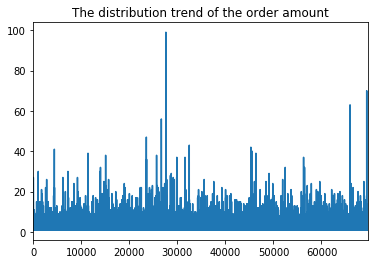

In [44]:
#商品销售数量动态分布
#2.1订单数量趋势分布
import matplotlib.pyplot as plt
data_order_amount.plot(title = 'The distribution trend of the order amount')

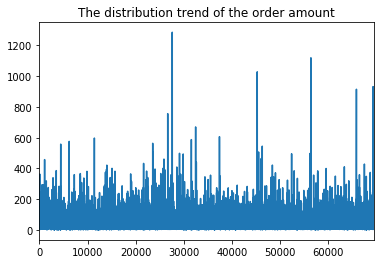

In [45]:
#2.2.订单金额趋势分布：
data_order_money.plot(title = 'The distribution trend of the order amount')

In [48]:
#2.3.异常值检测：
data.describe()

,user_id,order_period,order_amount,order_money
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [ ]:
#超过上四分位+1.5倍IQR距离，或者下四分位-1.5倍IQR距离的点为异常值

In [102]:
#3.1.1各用户累积购买数量分析
#使用order_amount列的user_id分组小计表示各订单的购买数量：
amount_by_id = data.groupby('user_id').order_amount.sum()
amount_by_id.head(100)

user_id
1       1
2       6
3      16
4       7
5      29
6       1
7      18
8      18
9       6
10      3
11      4
12      4
13      4
14      2
15      4
16      8
17      5
18      1
19     11
20     46
21      4
22      1
23      2
24      4
25     12
26      6
27     10
28      7
29     28
30      2
       ..
71      1
72      1
73      7
74      1
75      5
76      1
77      1
78      7
79      6
80      4
81     26
82     17
83      8
84      1
85      3
86      2
87     14
88      3
89     36
90      2
91      2
92      3
93     14
94      4
95     92
96     66
97     18
98      4
99     16
100     4
Name: order_amount, Length: 100, dtype: int64

In [103]:
amount_by_id.describe()

count    23570.000000
mean         7.122656
std         16.983531
min          1.000000
25%          1.000000
50%          3.000000
75%          7.000000
max       1033.000000
Name: order_amount, dtype: float64

In [120]:
#3.1.2各用户购买数量累积贡献分析
#每个用户购买次数
data_v_c = data['user_id'].value_counts()
data_v_c.head()

14048    217
7592     201
7983     149
22061    143
3049     117
Name: user_id, dtype: int64

In [68]:
data__ = data.groupby(['user_id'],as_index = False)['user_id'].agg({'count':'count'})
data__.head()

,user_id,count
0,1,1
1,2,2
2,3,6
3,4,4
4,5,11


In [123]:
#各用户购买数量排序（降序）：
data__.sort_values( by = 'count',ascending = False)

,user_id,count
14047,14048,217
7591,7592,201
7982,7983,149
22060,22061,143
3048,3049,117
498,499,110
19596,19597,109
7144,7145,102
2483,2484,80
10078,10079,67


In [104]:
#3.1.3.各用户 最大单笔购买数量分析
data['order_amount'].max()

99

In [105]:
data['order_amount'].argmax()

E:\Anaconda\Setup\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


27632

In [114]:
data.loc[27632]

user_id             8830.00
order_period    19980610.00
order_amount          99.00
order_money         1286.01
Name: 27632, dtype: float64

In [118]:
#3.2.1各用户 累积购买金额分析
money_by_id = data.groupby('user_id').order_money.sum()
money_by_id.head(100)
money_by_id.describe()

count    23570.000000
mean       106.080426
std        240.925195
min          0.000000
25%         19.970000
50%         43.395000
75%        106.475000
max      13990.930000
Name: order_money, dtype: float64

In [119]:
#3.2.2各用户 购买金额累积贡献分析
#每个用户购买次数
data_v_c = data['user_id'].value_counts()
data_v_c.head()

14048    217
7592     201
7983     149
22061    143
3049     117
Name: user_id, dtype: int64

In [165]:
#各用户购买的金额排序：
money_by_id.sort_values(ascending = False).head()

user_id
7592     13990.93
14048     8976.33
7983      6973.07
19339     6552.70
7931      6497.18
Name: order_money, dtype: float64

In [129]:
#3.2.3.最大单笔消费金额分析
data['order_money'].max()

1286.01

In [131]:
data.sort_values(by = 'order_money',ascending = False).head()

,user_id,order_period,order_amount,order_money
27632,8830,19980610,99,1286.01
56479,18847,19970307,32,1119.68
45314,14894,19970225,42,1028.51
69416,23474,19970607,70,932.23
65950,22279,19970726,63,915.10


In [133]:
#3.3.3.各用户购买次数分析：
data_v_c.head()

14048    217
7592     201
7983     149
22061    143
3049     117
Name: user_id, dtype: int64

In [167]:
#4.用户消费行为动态分析：
#4.1.各用户第一次购买时间分析
data_first = data.drop_duplicates('user_id') #drop_duplicates默认保留的是第一个出现的值组合,keep = 'last'则保留最后一个
data_first.describe()

,user_id,order_amount,order_money,now_data
count,23570.000000,23570.000000,23570.000000,23570
mean,11785.500000,2.154052,32.865264,8070 days 19:21:56.527223
std,6804.217258,2.044663,33.404484,23 days 07:31:11.270967
min,1.000000,1.000000,0.000000,8030 days 17:07:10.044406
25%,5893.250000,1.000000,14.370000,8050 days 17:07:10.044406
50%,11785.500000,1.000000,23.540000,8070 days 17:07:10.044406
75%,17677.750000,3.000000,39.990000,8089 days 17:07:10.044406
max,23570.000000,42.000000,1119.680000,8113 days 17:07:10.044406


In [164]:
data_first.head(10)

,user_id,order_period,order_amount,order_money
0,1,19970101,1,11.77
1,2,19970112,1,12.00
3,3,19970102,2,20.76
9,4,19970101,2,29.33
13,5,19970101,2,29.33
24,6,19970101,1,20.99
25,7,19970101,2,28.74
28,8,19970101,1,9.77
36,9,19970101,2,23.54
39,10,19970121,3,39.31


In [163]:
#4.2各用户 最后一次购买时间分析
data_last = data.drop_duplicates('user_id',keep = 'last')
data_last.head(10)

,user_id,order_period,order_amount,order_money,now_data
0,1,1997-01-01,1,11.77,8113 days 17:07:10.044406
2,2,1997-01-12,5,77.00,8102 days 17:07:10.044406
8,3,1998-05-28,1,16.99,7601 days 17:07:10.044406
12,4,1997-12-12,2,26.48,7768 days 17:07:10.044406
23,5,1998-01-03,3,37.47,7746 days 17:07:10.044406
24,6,1997-01-01,1,20.99,8113 days 17:07:10.044406
27,7,1998-03-22,9,138.50,7668 days 17:07:10.044406
35,8,1998-03-29,2,24.46,7661 days 17:07:10.044406
38,9,1998-06-08,2,41.98,7590 days 17:07:10.044406
39,10,1997-01-21,3,39.31,8093 days 17:07:10.044406


In [152]:
#4.3各用户 最后(近)一次消费与当前时间间隔
#当前时间：
from datetime import datetime
now = datetime.now()
data['order_period'] = pd.to_datetime(data.order_period,format = '%Y%m%d')
data.head()

,user_id,order_period,order_amount,order_money
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,2,1997-01-12,5,77.00
3,3,1997-01-02,2,20.76
4,3,1997-03-30,2,20.76


In [171]:
data['now_data'] = pd.DataFrame(pd.to_datetime(now)-data['order_period'])
data.head()

,user_id,order_period,order_amount,order_money,now_data
0,1,1997-01-01,1,11.77,8113 days 17:07:10.044406
1,2,1997-01-12,1,12.00,8102 days 17:07:10.044406
2,2,1997-01-12,5,77.00,8102 days 17:07:10.044406
3,3,1997-01-02,2,20.76,8112 days 17:07:10.044406
4,3,1997-03-30,2,20.76,8025 days 17:07:10.044406


In [184]:
#4.4各用户 生命周期分析
#第一次消费至最后一次消费时间之差为用户的生命周期
data_first['order_period'] = pd.to_datetime(data_first.order_period,format = '%Y%m%d')
data_last['order_period'] = pd.to_datetime(data_last.order_period,format = '%Y%m%d')
#data_last['lifecycle'] =data_last['order_period'] - data_first['order_period']
order_date_min = data.groupby('user_id').order_period.min() 
order_date_max = data.groupby('user_id').order_period.max() 
(order_date_max-order_date_min).head(10)
#data_last['lifecycle'] = data

E:\Anaconda\Setup\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda\Setup\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


user_id
1      0 days
2      0 days
3    511 days
4    345 days
5    367 days
6      0 days
7    445 days
8    452 days
9    523 days
10     0 days
Name: order_period, dtype: timedelta64[ns]

In [185]:
(order_date_max-order_date_min).mean()

Timedelta('134 days 20:55:36.987696')

In [188]:
#分析复购率和回购率
#复购率指在某时间窗口（一个月）内消费两次及以上用户所占的比例：消费两次及以上记为1，消费一次计0
data['month'] = data.order_period.astype('datetime64[M]')
data.head(10)

,user_id,order_period,order_amount,order_money,now_data,month
0,1,1997-01-01,1,11.77,8113 days 17:07:10.044406,1997-01-01
1,2,1997-01-12,1,12.00,8102 days 17:07:10.044406,1997-01-01
2,2,1997-01-12,5,77.00,8102 days 17:07:10.044406,1997-01-01
3,3,1997-01-02,2,20.76,8112 days 17:07:10.044406,1997-01-01
4,3,1997-03-30,2,20.76,8025 days 17:07:10.044406,1997-03-01
5,3,1997-04-02,2,19.54,8022 days 17:07:10.044406,1997-04-01
6,3,1997-11-15,5,57.45,7795 days 17:07:10.044406,1997-11-01
7,3,1997-11-25,4,20.96,7785 days 17:07:10.044406,1997-11-01
8,3,1998-05-28,1,16.99,7601 days 17:07:10.044406,1998-05-01
9,4,1997-01-01,2,29.33,8113 days 17:07:10.044406,1997-01-01


In [189]:
#将数据透视：
pivoted_counts = data.pivot_table(index = 'user_id',columns = 'month',values = 'order_period',aggfunc = 'count').fillna(0)
pivoted_counts.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [190]:
#将月份转换为标准格式：
columns_month = data.month.sort_values().astype('str').unique()
pivoted_counts.columns = columns_month
pivoted_counts.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [191]:
pivoted_counts_transf = pivoted_counts.applymap(lambda x: 1 if x>1 else np.NaN if x==0 else 0)
pivoted_counts_transf.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


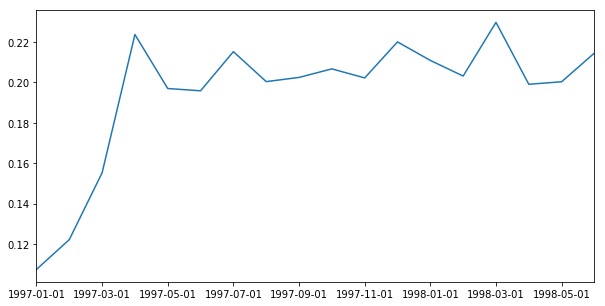

In [195]:
(pivoted_counts_transf.sum()/pivoted_counts_transf.count()).plot(figsize = (10,5))

In [201]:
#回购率
#回购率指在某一个时间窗口内消费，在下一个时间窗口仍然消费的顾客占比
#每个月的购买平均值（顺便代表购买了）
pivoted_buy_back = data.pivot_table(index = 'user_id',columns = 'month',values = 'order_money',aggfunc = 'mean').fillna(0)
pivoted_buy_back.columns = columns_month
pivoted_buy_back.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,11.77,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
2,44.50,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
3,20.76,0.0,20.76,19.54,0.00,0.00,0.00,0.00,0.00,0.0,39.205,0.000,0.00,0.0,0.0,0.0,16.99,0.0
4,29.53,0.0,0.00,0.00,0.00,0.00,0.00,14.96,0.00,0.0,0.000,26.480,0.00,0.0,0.0,0.0,0.00,0.0
5,21.65,38.9,0.00,45.55,38.71,26.14,28.14,0.00,40.47,0.0,0.000,43.465,37.47,0.0,0.0,0.0,0.00,0.0


In [202]:
#有购买则为1
pivoted_buied = pivoted_buy_back.applymap(lambda x:1 if x> 0 else 0)
pivoted_buied.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [203]:
def purchase_return(data):
    status = []
    for i in range(17):
        if data[i] == 1:
            if data[i+1] == 1:
                status.append(1)
            if data[i+1] == 0:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)
    return status
from pandas import DataFrame
pivoted_purchase_return = pivoted_buied.apply(purchase_return, axis = 1)
user_id = pivoted_buied.index
pivoted_purchase_return1 = pd.DataFrame(list(pivoted_purchase_return),columns = columns_month, index = user_id)
pivoted_purchase_return1.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


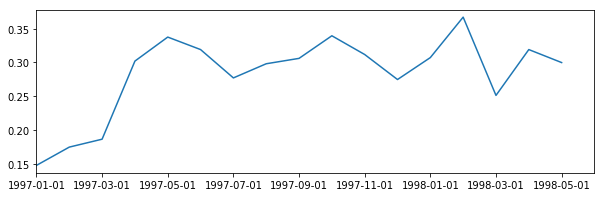

In [204]:
pivoted_purchase_return1.mean().plot(figsize = (10,3))